# Hierarchical model fit on Splatter datasets

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pystan
import numpy as np
import seaborn as sns
from scipy.stats import norm
import itertools
from sklearn.cluster import KMeans
from sklearn import datasets
import os
import pickle
import scipy
from utils import loadStan, hierarchical_model, est_k
sns.set()
from sklearn.metrics import adjusted_rand_score
import csv
import math
import time

ppca_model = loadStan('ppca')
gmm_model = loadStan('gmm')
moppcas_model = loadStan('moppcas')
moppcas_weighted = loadStan('moppcas_weighted')
ppca_weighted = loadStan('ppca_weighted')
gmm_weighted = loadStan('gmm_weighted')

Loading model  ppca
Model loaded succesfully from cache.
Loading model  gmm
Model loaded succesfully from cache.
Loading model  moppcas
Model loaded succesfully from cache.
Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.
Loading model  gmm_weighted
Model loaded succesfully from cache.


## Comparison NUTS and VB in terms of speed and accuracy

### Dataset 1

Analyzing dataset of 5 genes: 
Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


Estimated number of clusters on top-level data: 3 (out of a maximum of) 3
level 1:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 3 clusters.
level 2:
Cluster 1:
First guess: cluster 1 contains 2 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 2 clusters.
Cluster 2:
First guess: cluster 2 contains 2 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 2 clusters.
Cluster 3:
Cluster  3  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


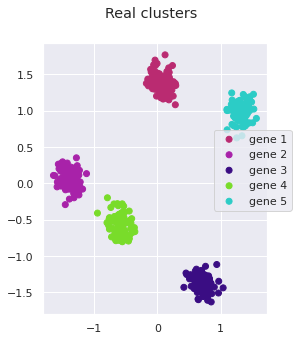

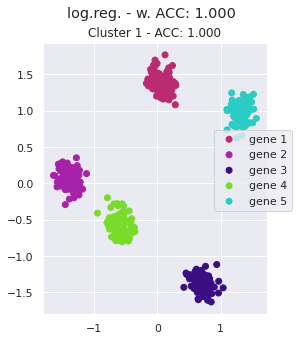

level  1


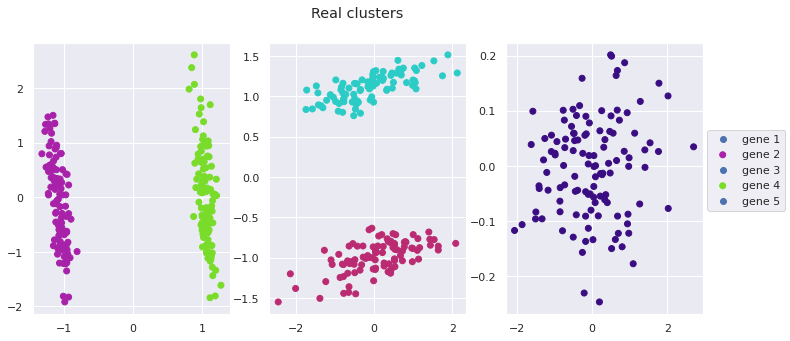

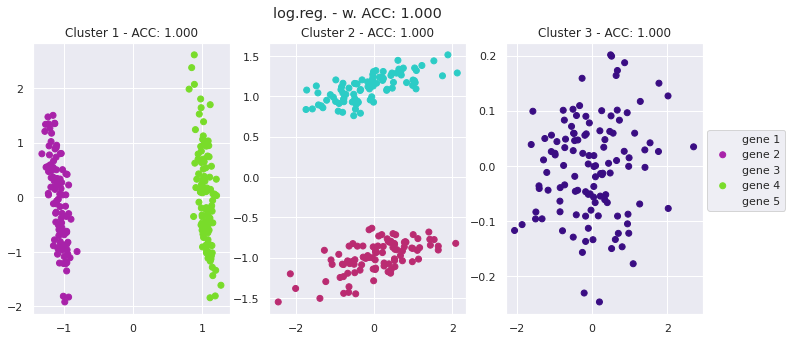

level  2


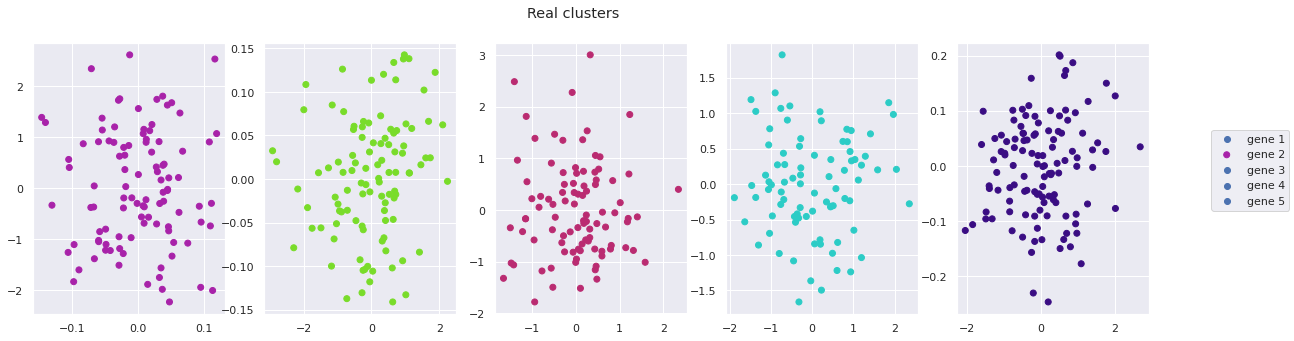

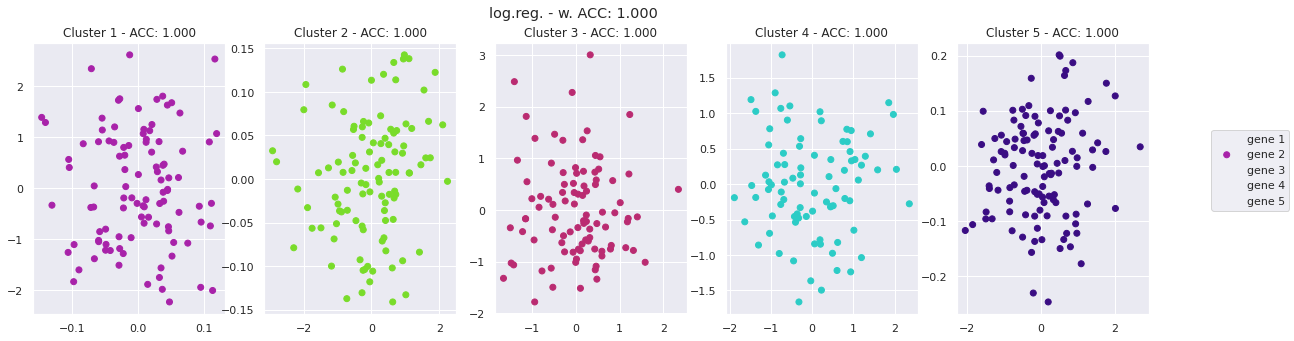

Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Estimated number of clusters on top-level data: 3 (out of a maximum of) 3
level 1:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 3 clusters.
level 2:
Cluster 1:
First guess: cluster 1 contains 2 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 2 clusters.
Cluster 2:
3  clusters according to AIC,  2  clusters according to BIC.
First guess: cluster 2 contains 2 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 2 clusters.
Cluster 3:
Cluster  3  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


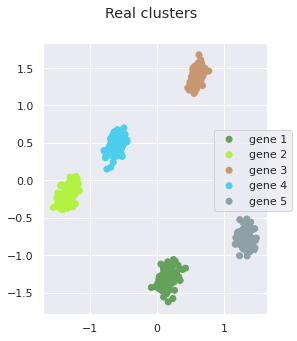

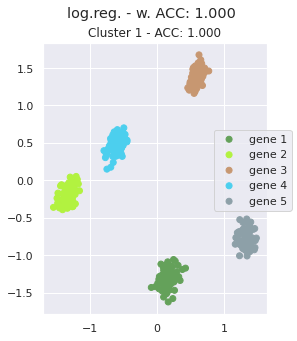

level  1


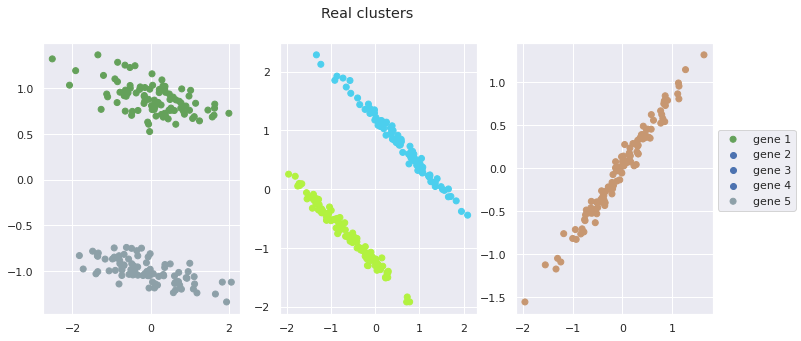

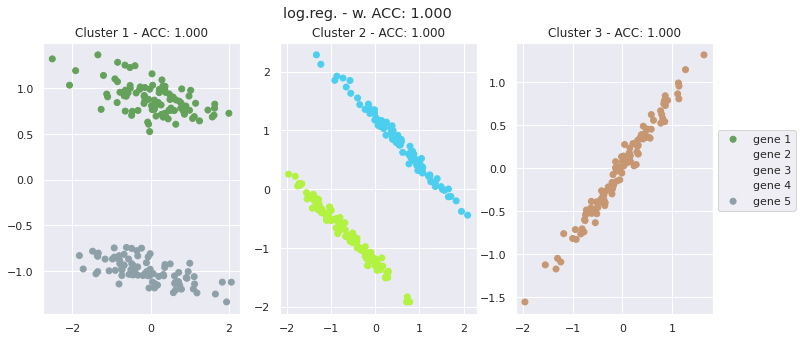

level  2


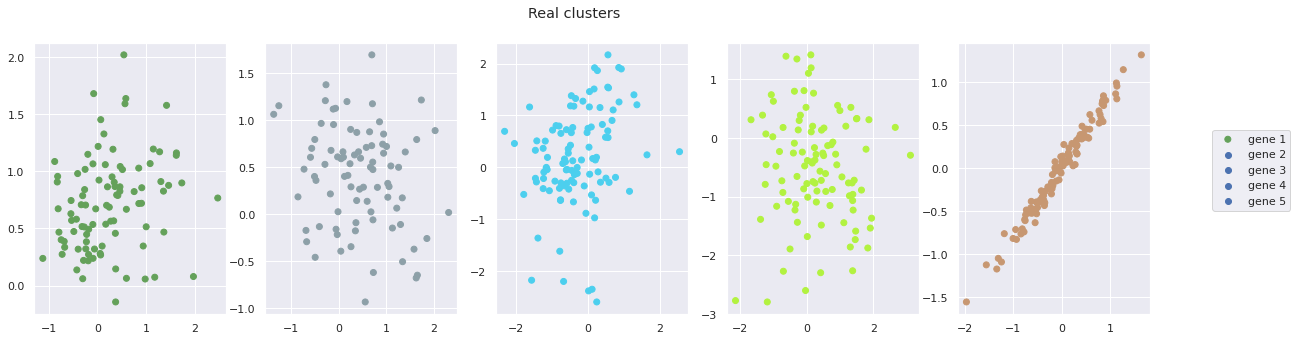

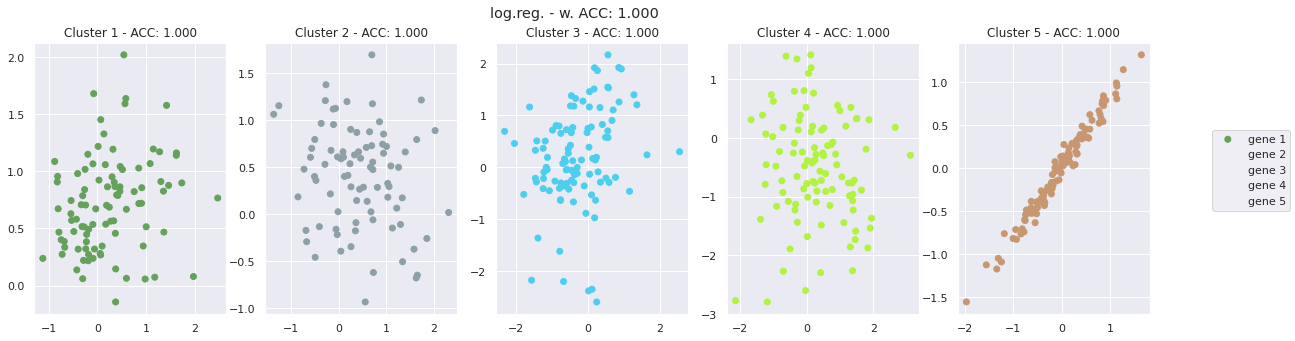

Analyzing dataset of 25 genes: 
Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


Estimated number of clusters on top-level data: 3 (out of a maximum of) 3
level 1:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 3 clusters.
level 2:
Cluster 1:
First guess: cluster 1 contains 2 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 2 clusters.
Cluster 2:
Cluster  2  doesnt contain any more subclusters
Cluster 3:
3  clusters according to AIC,  2  clusters according to BIC.
First guess: cluster 3 contains 2 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 2 clusters.
level 3:
Cluster 1:
Cluster  1  doesnt contain any more subclusters
Cluster 2:
Cluster  2  doesnt contain any more subclusters
Cluster 3:
Cluster  3  doesnt contain any more subclusters
Cluster 4:
3  clusters according to AIC,  1  clusters according to BIC.
Cluster  4  doesnt contain any more subclusters
Cluster 5:
Cluster  5  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


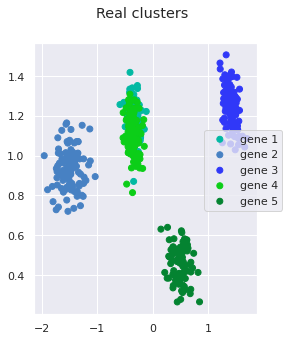

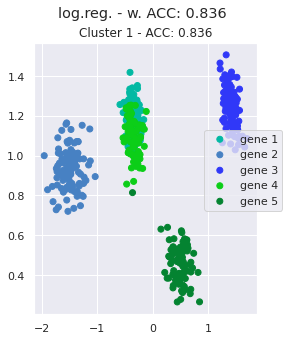

level  1


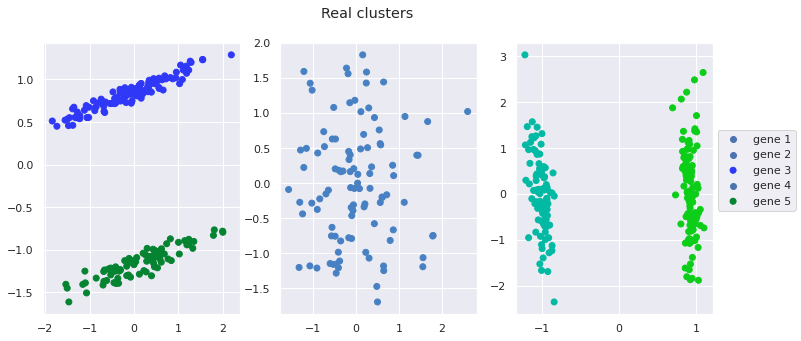

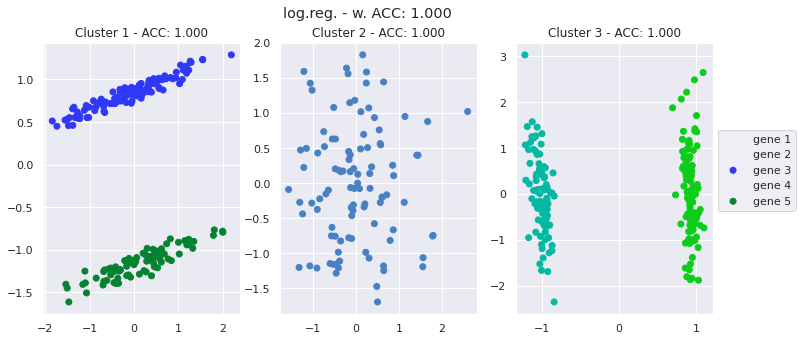

level  2


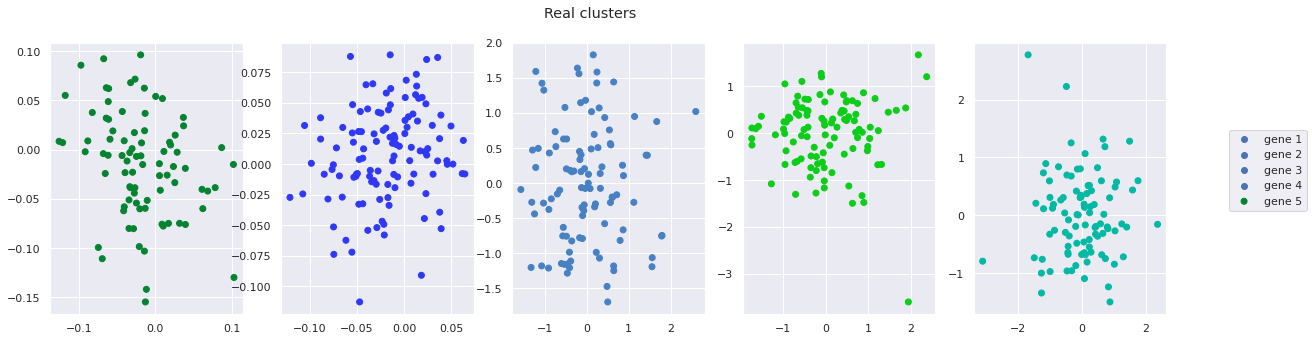

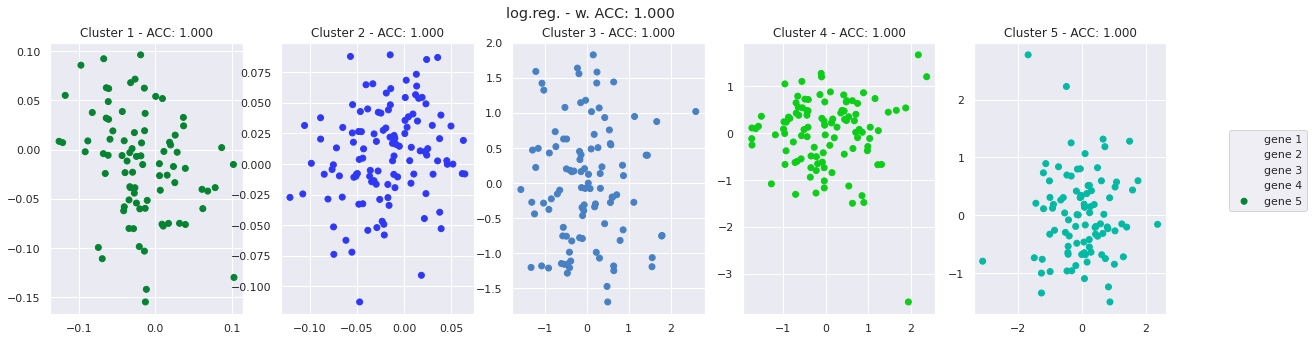

level  3


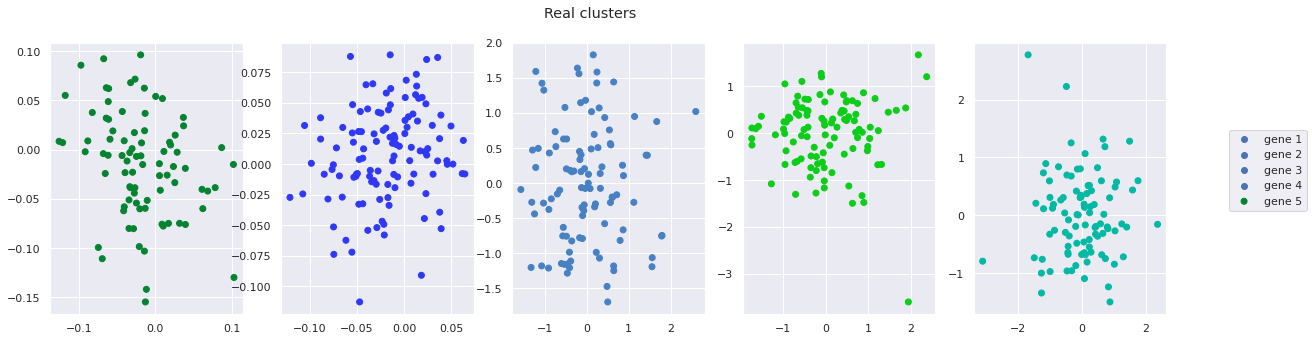

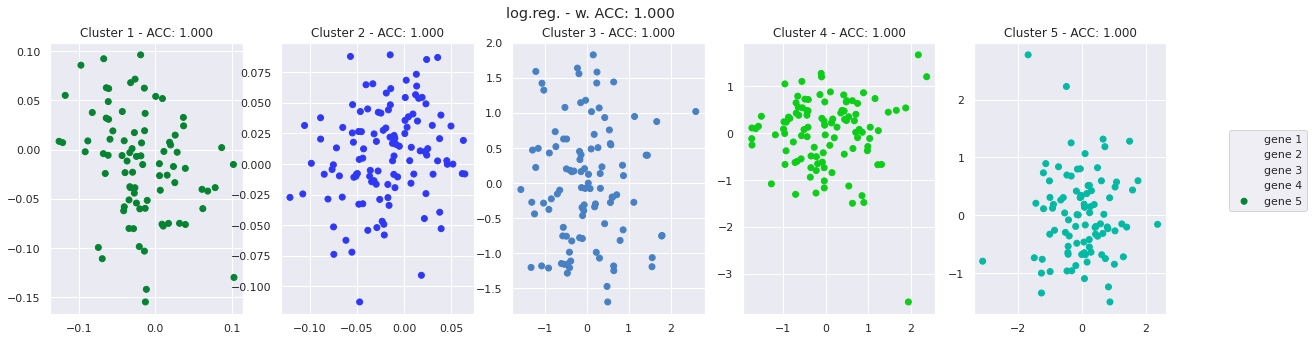

Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Estimated number of clusters on top-level data: 3 (out of a maximum of) 3
level 1:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 3 clusters.
level 2:
Cluster 1:
2  clusters according to AIC,  1  clusters according to BIC.
Cluster  1  doesnt contain any more subclusters
Cluster 2:
First guess: cluster 2 contains 3 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 3 clusters.
Cluster 3:
Cluster  3  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


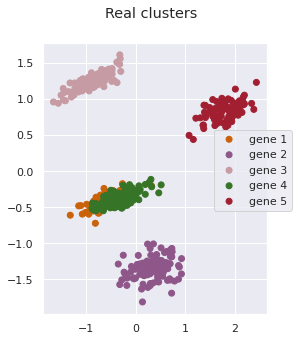

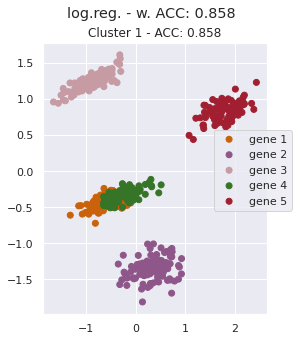

level  1


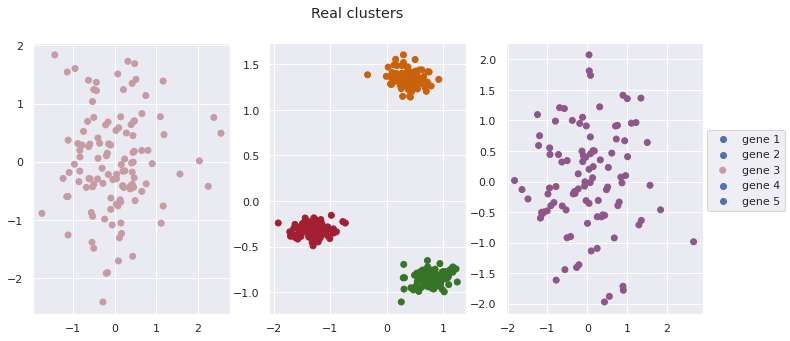

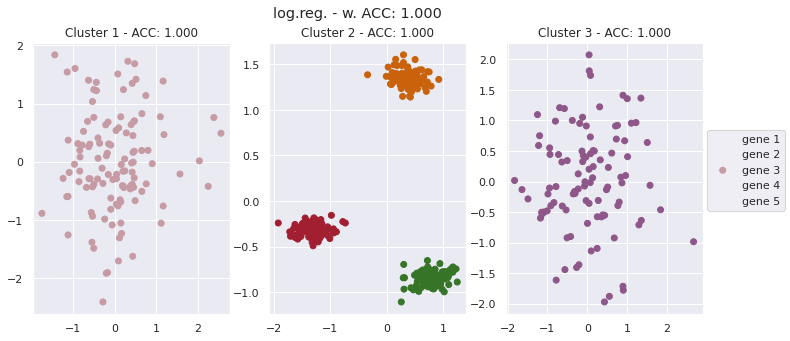

level  2


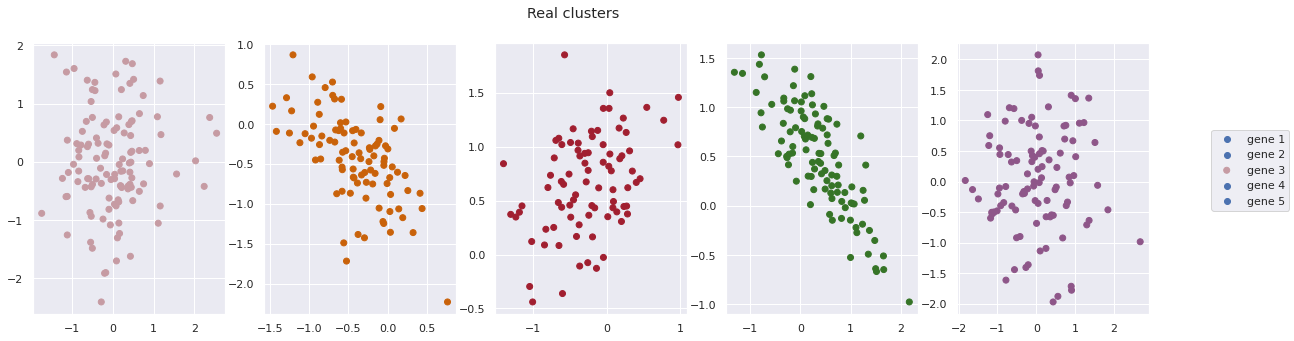

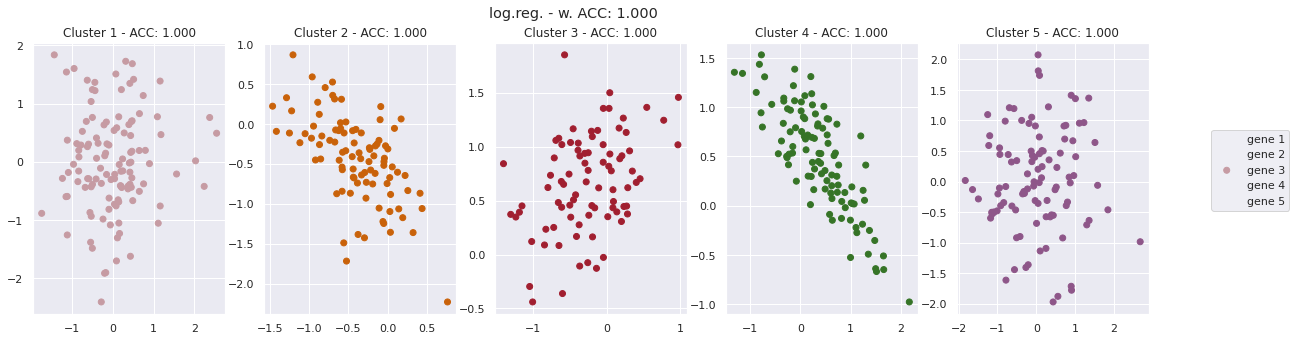

Analyzing dataset of 50 genes: 
Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


Estimated number of clusters on top-level data: 3 (out of a maximum of) 3
level 1:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 3 clusters.
level 2:
Cluster 1:
Cluster  1  doesnt contain any more subclusters
Cluster 2:
3  clusters according to AIC,  2  clusters according to BIC.
First guess: cluster 2 contains 2 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 2 clusters.
Cluster 3:
First guess: cluster 3 contains 2 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 2 clusters.
level 3:
Cluster 1:
Cluster  1  doesnt contain any more subclusters
Cluster 2:
Cluster  2  doesnt contain any more subclusters
Cluster 3:
2  clusters according to AIC,  1  clusters according to BIC.
Cluster  3  doesnt contain any more subclusters
Cluster 4:
2  clusters according to AIC,  1  clusters according to BIC.
Cluster  4  doesnt contain any more subclusters
Cluster 5:
3  clusters according to AIC,  1  clusters according to BIC.
Cluster  5  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


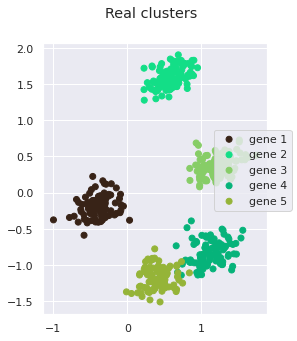

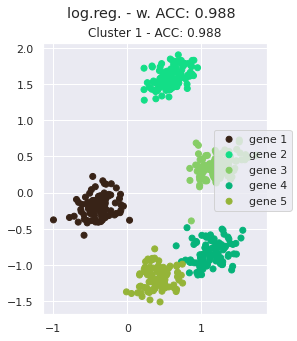

level  1


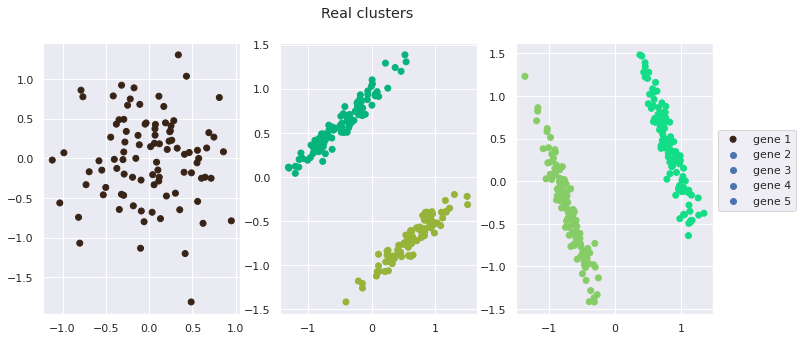

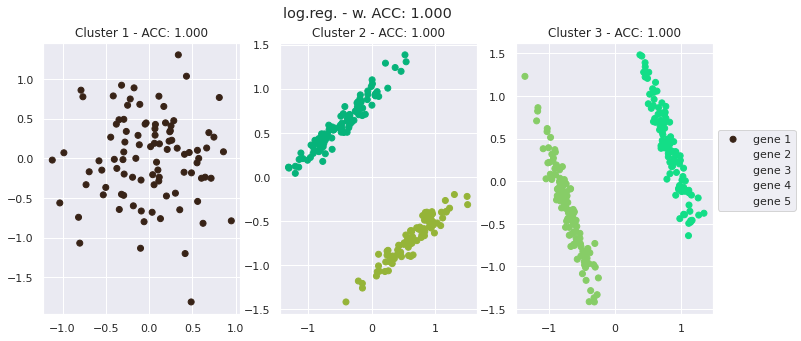

level  2


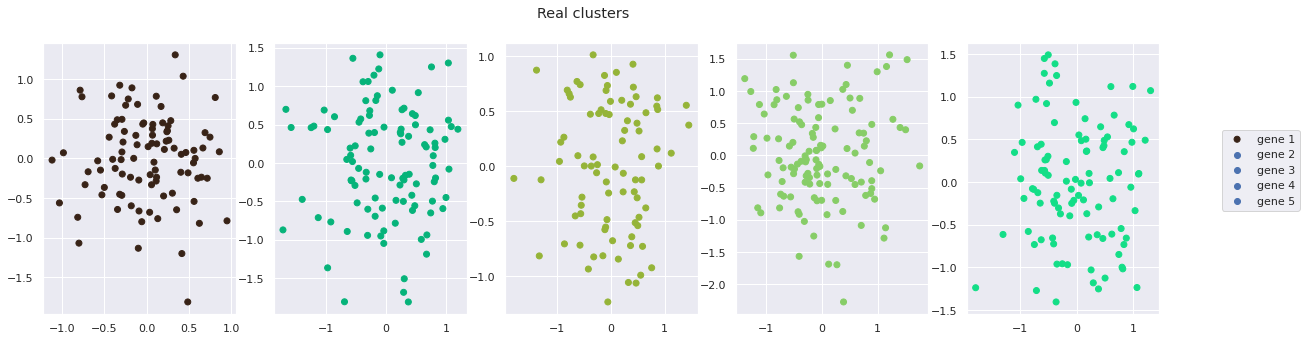

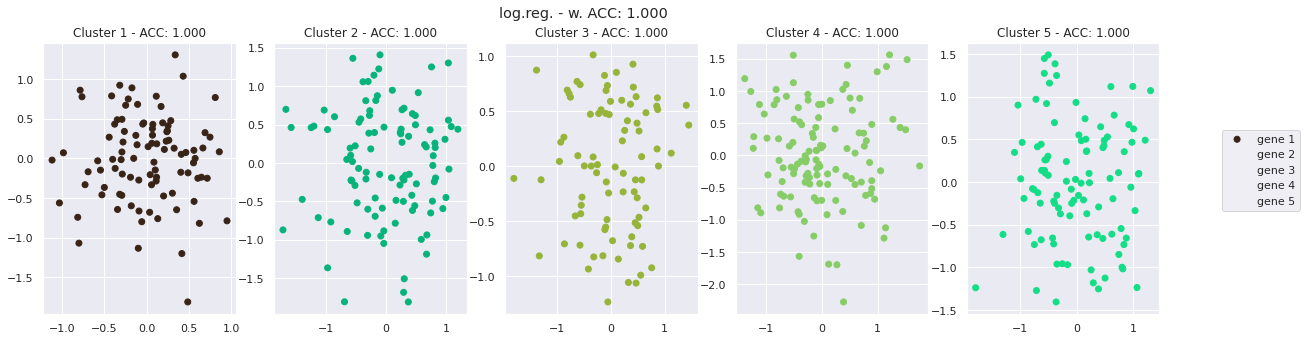

level  3


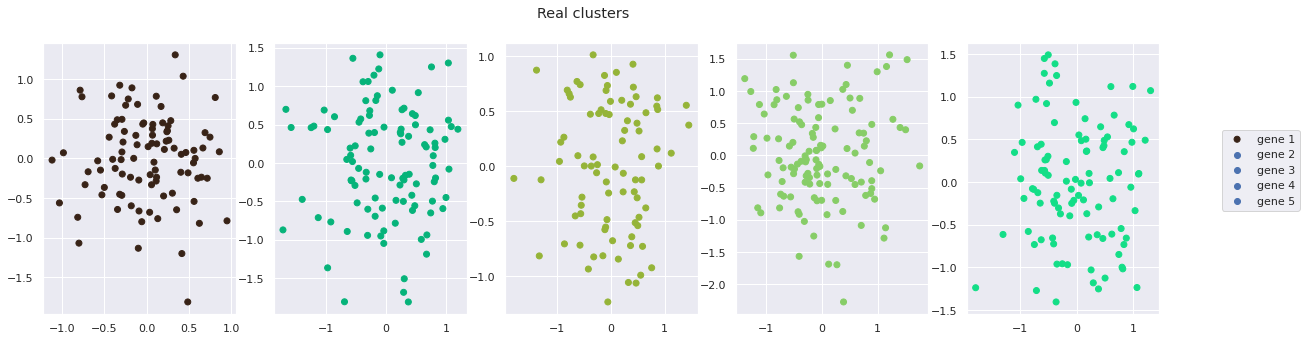

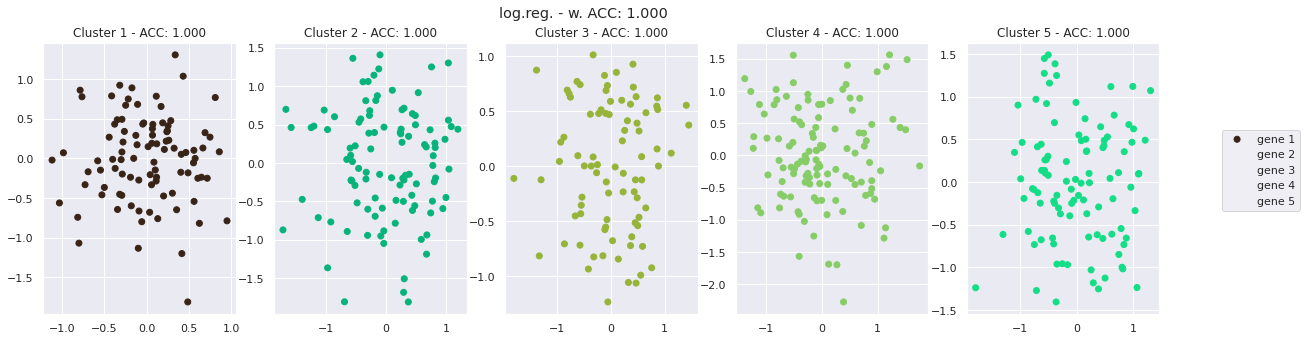

Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Estimated number of clusters on top-level data: 3 (out of a maximum of) 3
level 1:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 3 clusters.
level 2:
Cluster 1:
First guess: cluster 1 contains 2 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 2 clusters.
Cluster 2:
3  clusters according to AIC,  2  clusters according to BIC.
First guess: cluster 2 contains 2 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 2 clusters.
Cluster 3:
Cluster  3  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


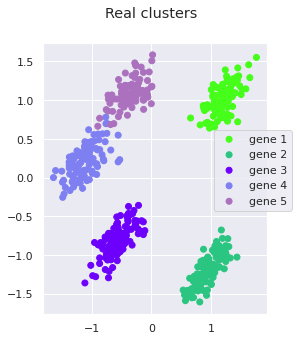

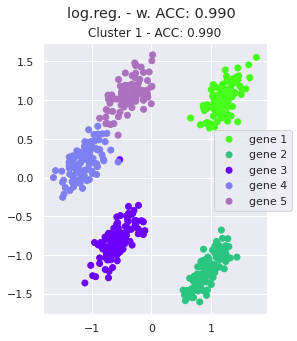

level  1


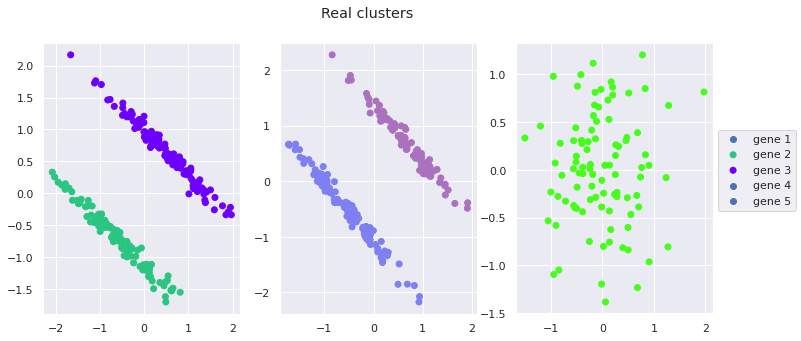

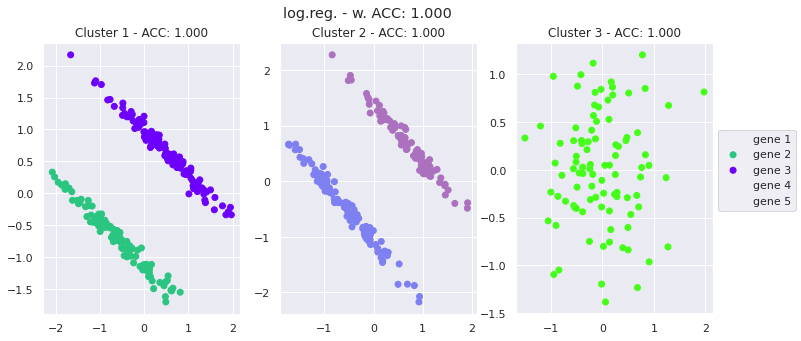

level  2


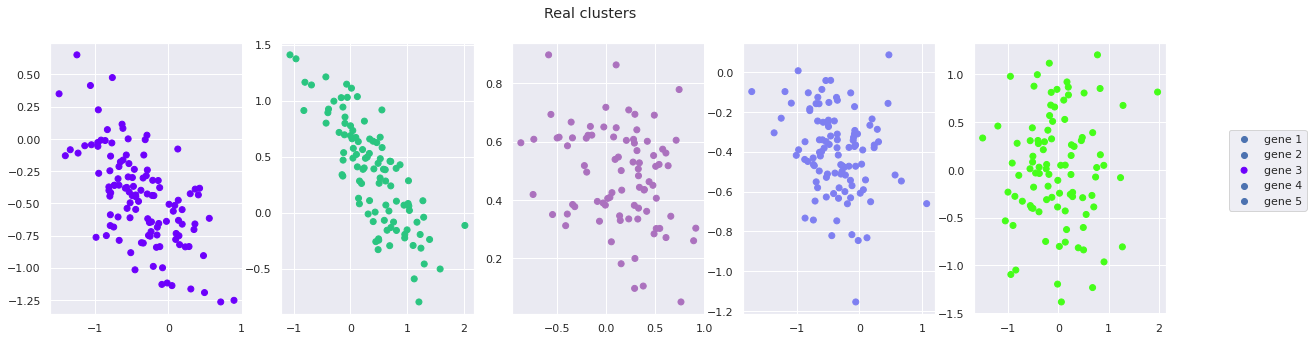

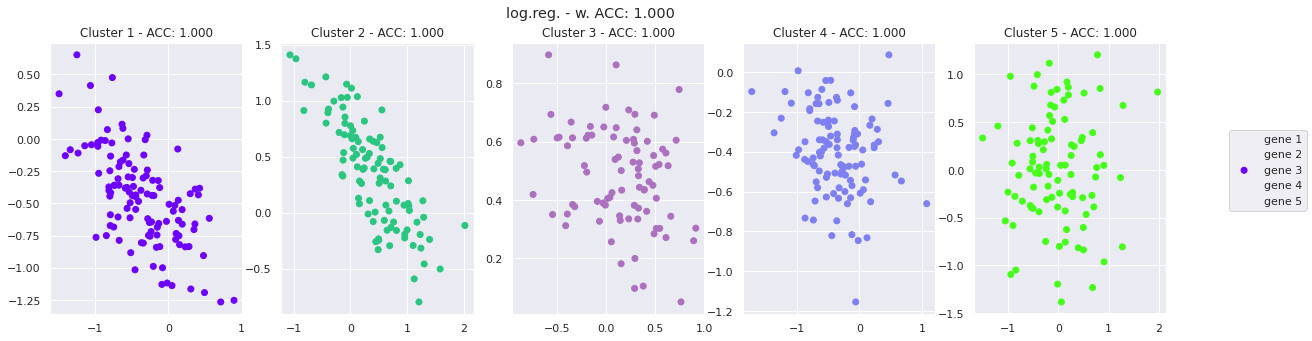

Analyzing dataset of 150 genes: 
Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


Estimated number of clusters on top-level data: 3 (out of a maximum of) 3
level 1:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 1 clusters.
Trying again for a better fit.


Found MoPPCAs fit with 3 clusters.
level 2:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 3 clusters.
Cluster 2:
Cluster  2  doesnt contain any more subclusters
Cluster 3:
Cluster  3  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


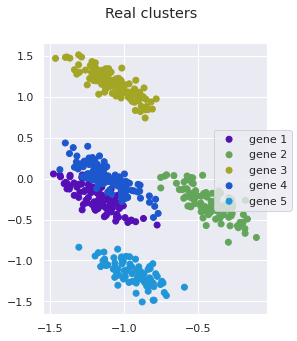

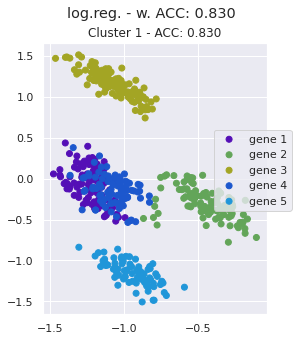

level  1


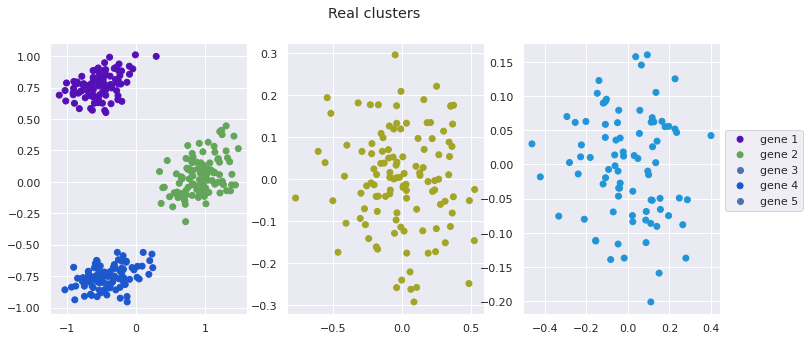

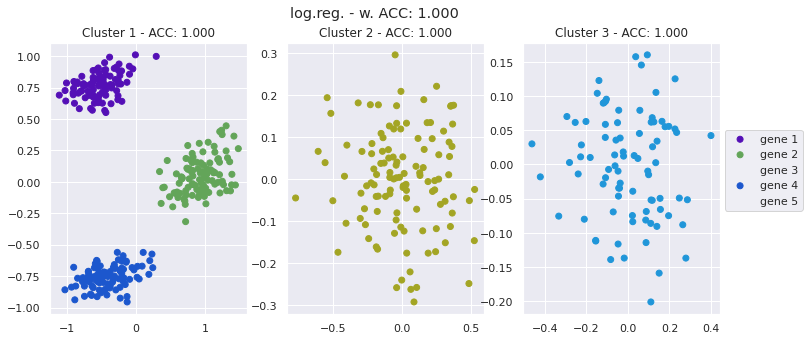

level  2


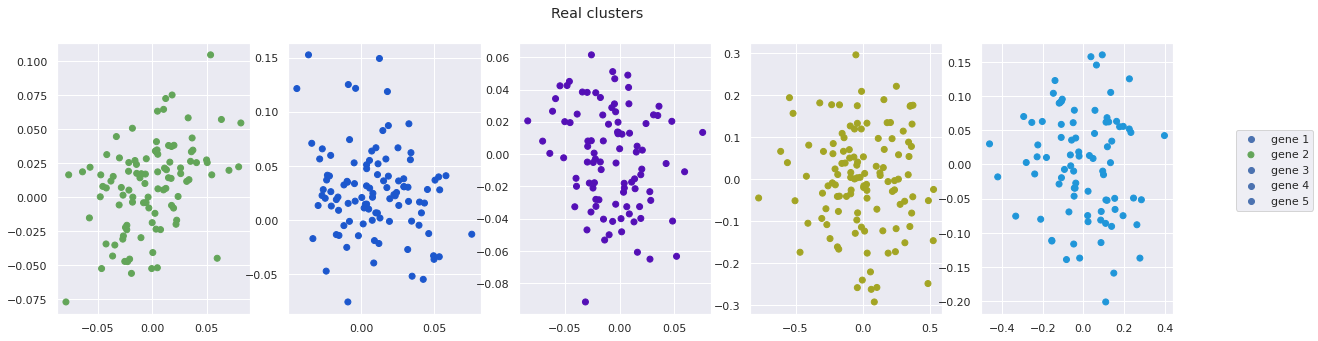

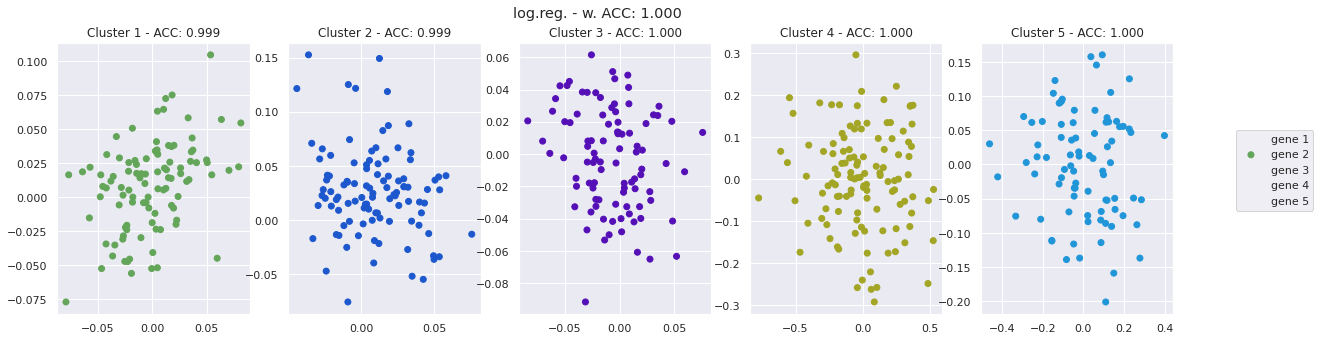

Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Estimated number of clusters on top-level data: 3 (out of a maximum of) 3
level 1:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 2 clusters.
Trying again for a better fit.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 3 clusters.
level 2:
Cluster 1:
Cluster  1  doesnt contain any more subclusters
Cluster 2:
First guess: cluster 2 contains 3 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 3 clusters.
Cluster 3:
Cluster  3  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


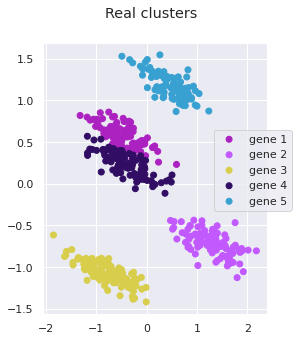

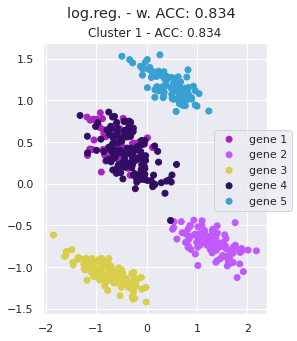

level  1


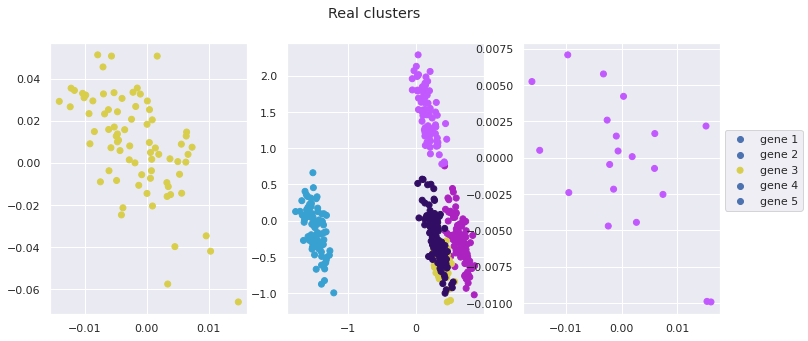

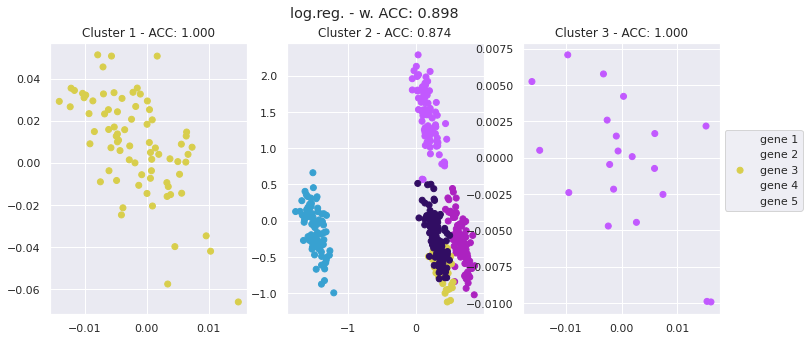

level  2


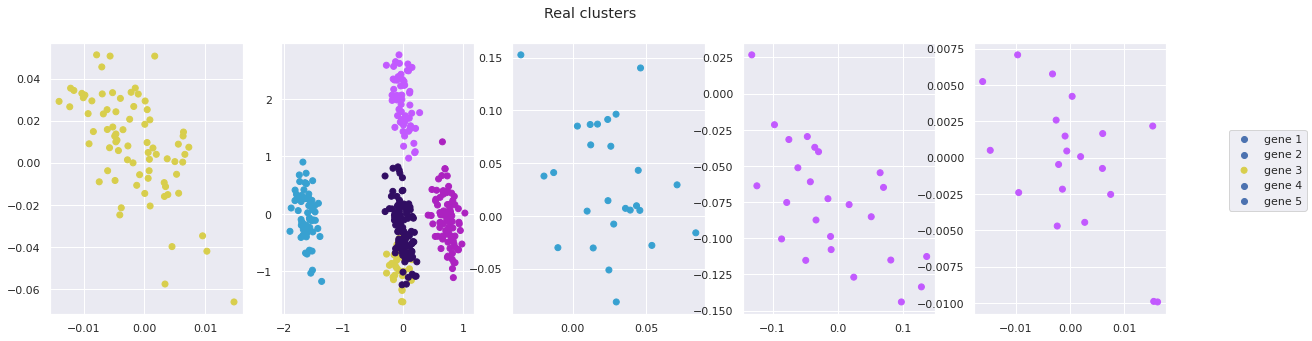

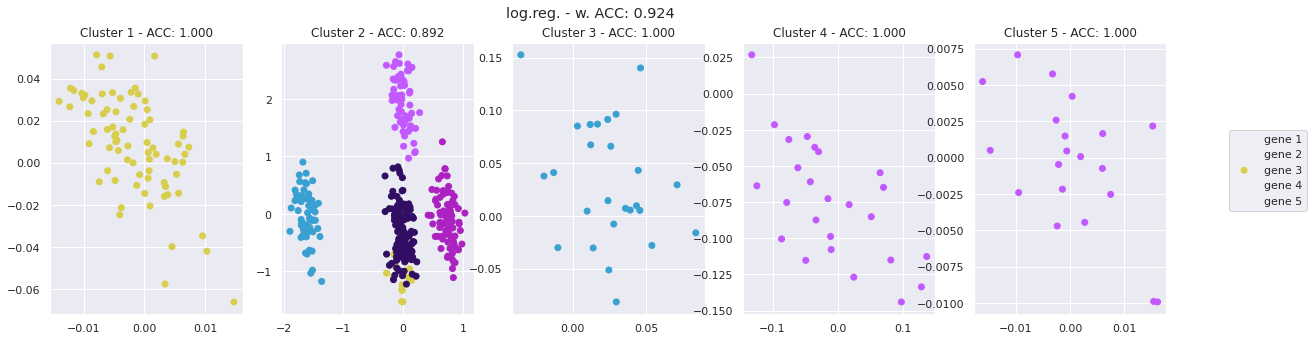

Analyzing dataset of 250 genes: 
Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


3  clusters according to AIC,  2  clusters according to BIC.
Estimated number of clusters on top-level data: 2 (out of a maximum of) 3
level 1:
Cluster 1:
3  clusters according to AIC,  2  clusters according to BIC.
First guess: cluster 1 contains 2 subclusters (out of a maximum of 3)


Found MoPPCAs fit with 1 clusters.
Trying again for a better fit.


Found MoPPCAs fit with 1 clusters.
Trying again for a better fit.


Found MoPPCAs fit with 1 clusters.
MoPPCAS was looking for 2 clusters, but no more subclusters were found.
All clusters are fully analyzed!
level  0


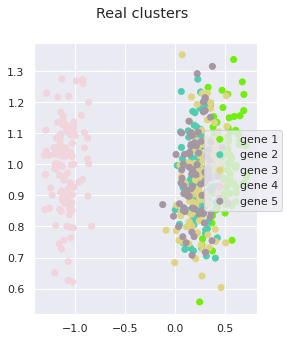

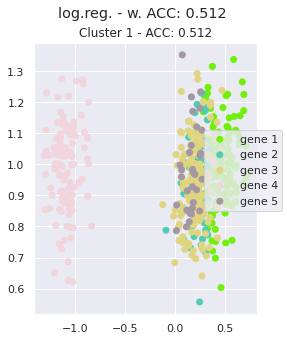

level  1


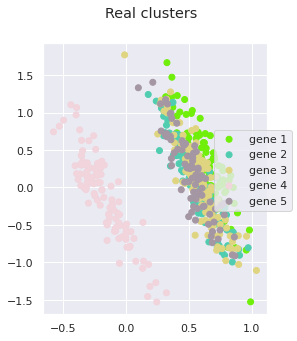

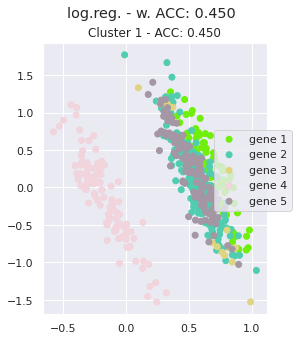

Loading model  moppcas_weighted
Model loaded succesfully from cache.
Loading model  ppca_weighted
Model loaded succesfully from cache.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


3  clusters according to AIC,  2  clusters according to BIC.
Estimated number of clusters on top-level data: 2 (out of a maximum of) 3
level 1:
Cluster 1:
3  clusters according to AIC,  2  clusters according to BIC.
First guess: cluster 1 contains 2 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 1 clusters.
Trying again for a better fit.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 2 clusters.
level 2:
Cluster 1:
First guess: cluster 1 contains 3 subclusters (out of a maximum of 3)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 2 clusters.
Trying again for a better fit.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 1 clusters.
Trying again for a better fit.


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Found MoPPCAs fit with 2 clusters.
MoPPCAS was looking for 3 clusters, but found only 2 clusters.
Cluster 2:
Cluster  2  doesnt contain any more subclusters
All clusters are fully analyzed!
level  0


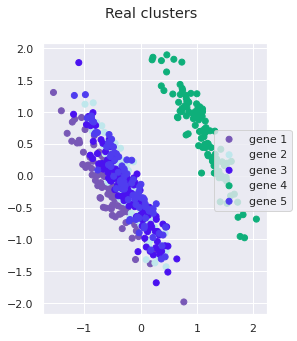

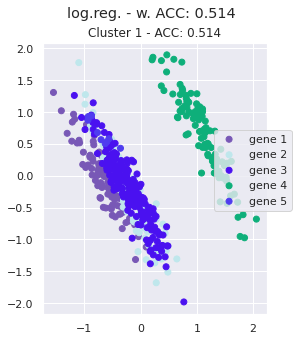

level  1


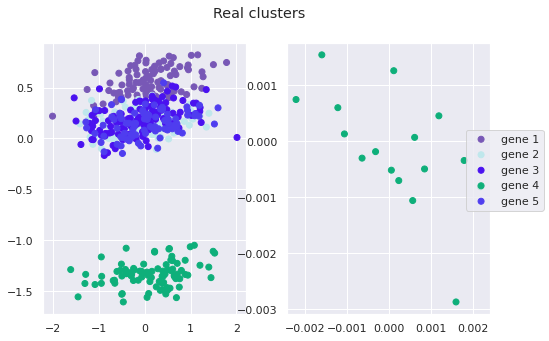

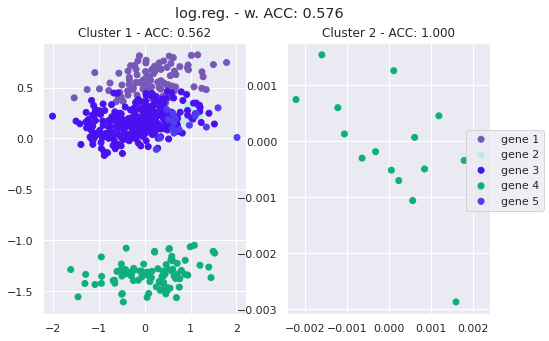

level  2


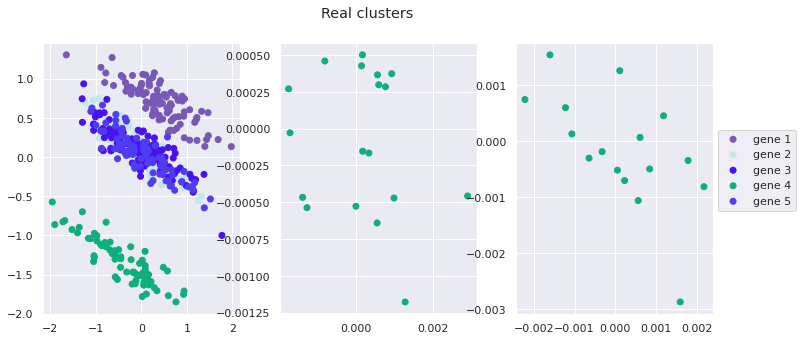

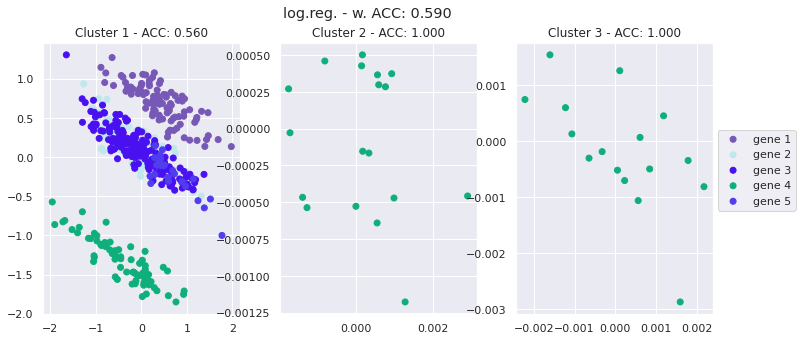

In [2]:
timings_nuts = []
timings_vb = []
knots_nuts_try = []
knots_vb_try = []
knots_nuts_found = []
knots_vb_found = []
acc_scores_nuts = []
acc_scores_vb = []

for num_dims in [5,25, 50,150, 250]:
    print('Analyzing dataset of %i genes: '%num_dims)
    with open('./splattersets/splatter_small_%i.csv'%num_dims) as file:
        text = csv.reader(file)
        data = np.array(np.array(list(text))[1:,1:].T, dtype=int)
    with open('./splattersets/splatter_small_%i_labels.csv'%num_dims) as file:
        text = csv.reader(file)
        labels_raw = np.array(list(text))
    data = np.log(data+1)
    labels = np.unique(labels_raw[1:,1], return_inverse=True)[1]
    labelnames = ['gene '+str(i+1) for i in set(labels)]
    model = hierarchical_model()
    latent, cats_per_lvl, probs, times_vb, knots_vb_trd, knots_vb_fnd = model.fit(data, max_depth=5, k_max=3, samplingmethod='VB', plotting=False)
    timings_vb.append(times_vb)
    knots_vb_try.append(knots_vb_trd)
    knots_vb_found.append(knots_vb_fnd)
    scores_vb = model.visual_score(labels, plotlegend=True, savefigs=True, labelnames = labelnames, plot_hmppca = False, plot_hmppca_logres = False, plot_real = True, plot_logreg = True)
    acc_scores_vb.append(scores_vb)
    
    model = hierarchical_model()
    latent, cats_per_lvl, probs, times_nuts, knots_nuts_trd, knots_nuts_fnd = model.fit(data, max_depth=5, k_max=3, samplingmethod='NUTS', plotting=False)
    timings_nuts.append(times_nuts)
    knots_nuts_try.append(knots_nuts_trd)
    knots_nuts_found.append(knots_nuts_fnd)
    scores_nuts = model.visual_score(labels, plotlegend=True, savefigs=True, labelnames = labelnames, plot_hmppca = False, plot_hmppca_logres = False, plot_real = True, plot_logreg = True)
    acc_scores_nuts.append(scores_nuts)
    
#     plt.plot(range(1,len(times_vb)+1), times_vb, label='VB')
#     plt.plot(range(1,len(times_nuts)+1), times_nuts, label='NUTS')
#     plt.title('Seconds per (Mo-)PPCAs')
#     plt.ylabel('seconds')
#     plt.legend()
#     plt.show()
    
#     plt.plot(range(len(scores_vb)), scores_vb, label='VB')
#     plt.xlabel('level')
#     plt.ylabel('w. accuracy')
#     plt.plot(range(len(scores_nuts)), scores_nuts, label='NUTS')
#     plt.legend()
#     plt.plot()
    

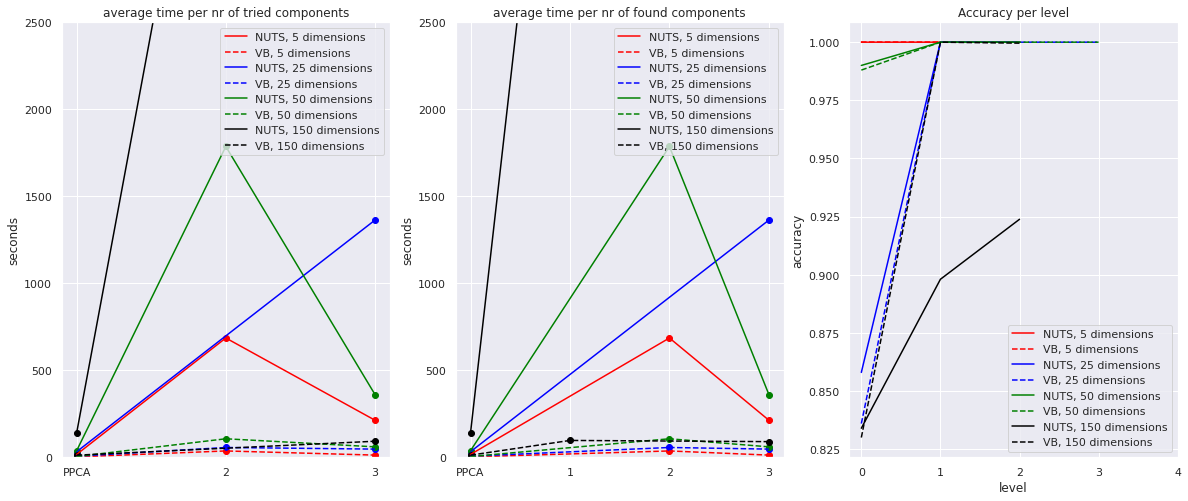

In [3]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(131)
ax.set_title('average time per nr of tried components')
for i in range(4):
    boxpoints_nuts = []
    nanindex_nuts = []
    boxpoints_vb = []
    nanindex_vb = []
    for j in [0,1,2,3]:
        if len(np.array(timings_nuts[i])[np.array(knots_nuts_try[i])==j])>0:
            boxpoints_nuts.append(np.mean(np.array(timings_nuts[i])[np.array(knots_nuts_try[i])==j]))
            nanindex_nuts.append(True)
        else:
            boxpoints_nuts.append(0)
            nanindex_nuts.append(False)
        if len(np.array(timings_vb[i])[np.array(knots_vb_try[i])==j])>0:
            boxpoints_vb.append(np.mean(np.array(timings_vb[i])[np.array(knots_vb_try[i])==j]))
            nanindex_vb.append(True)
        else:
            boxpoints_vb.append(0)
            nanindex_vb.append(False)
    nanindex_nuts = np.array(nanindex_nuts)
    boxpoints_nuts = np.array(boxpoints_nuts)
    nanindex_vb = np.array(nanindex_vb)
    boxpoints_vb = np.array(boxpoints_vb)
    ax.plot(np.array([1,1,2,3])[nanindex_nuts],boxpoints_nuts[nanindex_nuts], label='NUTS, %i dimensions'%[5,25, 50,150, 250][i], c= ['red', 'blue', 'green', 'black', 'purple'][i])
    ax.scatter(np.array([1,1,2,3])[nanindex_nuts],boxpoints_nuts[nanindex_nuts], c= ['red', 'blue', 'green', 'black', 'purple'][i])
    ax.plot(np.array([1,1,2,3])[nanindex_vb],boxpoints_vb[nanindex_vb], label='VB, %i dimensions'%[5,25, 50,150, 250][i], c= ['red', 'blue', 'green', 'black', 'purple'][i], linestyle='--')
    ax.scatter(np.array([1,1,2,3])[nanindex_vb],boxpoints_vb[nanindex_vb], c= ['red', 'blue', 'green', 'black', 'purple'][i])
i+=1
# ax.plot(knots_vb_found[i], timings_vb[i], label='V, %i dimensions'%[5,25, 50,150, 250][i], linestyle='--', c= ['red', 'blue', 'green', 'black', 'purple', 'purple'][i])
ax.legend(loc='upper right')
ax.set_ylabel('seconds')
ax.set_ylim((0,2500))
ax.set_xticks([1,2,3])
ax.set_xticklabels(['PPCA',2,3])
ax = fig.add_subplot(132)
ax.set_title('average time per nr of found components')
for i in range(4):
    boxpoints_nuts = []
    nanindex_nuts = []
    boxpoints_vb = []
    nanindex_vb = []
    for j in [0,1,2,3]:
        if len(np.array(timings_nuts[i])[np.array(knots_nuts_found[i])==j])>0:
            boxpoints_nuts.append(np.mean(np.array(timings_nuts[i])[np.array(knots_nuts_found[i])==j]))
            nanindex_nuts.append(True)
        else:
            boxpoints_nuts.append(0)
            nanindex_nuts.append(False)
        if len(np.array(timings_vb[i])[np.array(knots_vb_found[i])==j])>0:
            boxpoints_vb.append(np.mean(np.array(timings_vb[i])[np.array(knots_vb_found[i])==j]))
            nanindex_vb.append(True)
        else:
            boxpoints_vb.append(0)
            nanindex_vb.append(False)
    nanindex_nuts = np.array(nanindex_nuts)
    boxpoints_nuts = np.array(boxpoints_nuts)
    nanindex_vb = np.array(nanindex_vb)
    boxpoints_vb = np.array(boxpoints_vb)
    ax.plot(np.array([0,1,2,3])[nanindex_nuts],boxpoints_nuts[nanindex_nuts], label='NUTS, %i dimensions'%[5,25, 50,150, 250][i], c= ['red', 'blue', 'green', 'black', 'purple'][i])
    ax.scatter(np.array([0,1,2,3])[nanindex_nuts],boxpoints_nuts[nanindex_nuts], c= ['red', 'blue', 'green', 'black', 'purple'][i])
    ax.plot(np.array([0,1,2,3])[nanindex_vb],boxpoints_vb[nanindex_vb], label='VB, %i dimensions'%[5,25, 50,150, 250][i], c= ['red', 'blue', 'green', 'black', 'purple'][i], linestyle='--')
    ax.scatter(np.array([0,1,2,3])[nanindex_vb],boxpoints_vb[nanindex_vb], c= ['red', 'blue', 'green', 'black', 'purple'][i])
i+=1
ax.legend(loc='upper right')
ax.set_ylabel('seconds')
ax.set_ylim((0,2500))
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['PPCA', 1,2,3])
ax = fig.add_subplot(133)
ax.set_title('Accuracy per level')
for i in range(4):
    ax.plot(range(len(acc_scores_nuts[i])), acc_scores_nuts[i], label='NUTS, %i dimensions'%[5,25, 50,150, 250][i], c= ['red', 'blue', 'green', 'black', 'purple'][i])
    ax.plot(range(len(acc_scores_vb[i])), acc_scores_vb[i], label='VB, %i dimensions'%[5,25, 50,150, 250][i], linestyle='--', c= ['red', 'blue', 'green', 'black', 'purple'][i])
i+=1
# ax.plot(range(len(acc_scores_vb[i])), acc_scores_vb[i], label='V, %i dimensions'%[5,25, 50,150, 250][i], linestyle='--', c= ['red', 'blue', 'green', 'black', 'purple'][i])
ax.legend(loc='lower right')
ax.set_ylabel('accuracy')
ax.set_xlabel('level')
ax.set_xticks([0,1,2,3,4])
plt.show()

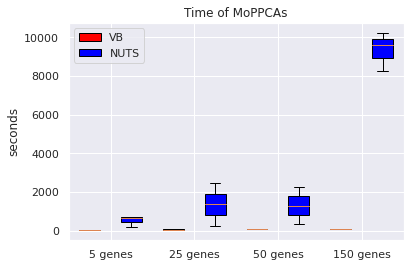

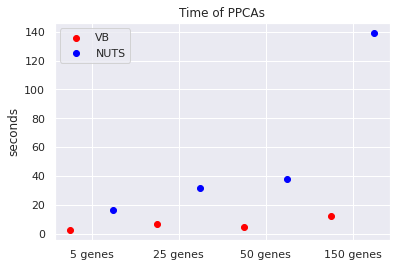

In [4]:
boxpoints = []
names = []
for i in range(4):
    boxpoints.append(timings_vb[i][1:])
    boxpoints.append(timings_nuts[i][1:])
    names.append('%i genes'%[5,25,50,150][i])
box = plt.boxplot(boxpoints, patch_artist=True)
i=0
for patch in box['boxes']:
    patch.set_facecolor(['red','blue'][i%2])
    i+=1
plt.legend(box['boxes'][:2],['VB','NUTS'])
plt.title('Time of MoPPCAs')
plt.ylabel('seconds')
plt.xticks(np.arange(1.5,len(boxpoints)+1.5,2),names)
plt.show()

boxpoints_vb = []
boxpoints_nuts = []
names = []
for i in range(4):
    boxpoints_vb.append(timings_vb[i][0])
    boxpoints_nuts.append(timings_nuts[i][0])
    names.append('%i genes'%[5,25,50,150][i])
# box = plt.boxplot(boxpoints, patch_artist=True)
plt.scatter(range(1,8,2),boxpoints_vb, c='red', label='VB')
plt.scatter(range(2,9,2),boxpoints_nuts, c='blue', label='NUTS')
plt.legend()
plt.title('Time of PPCAs')
plt.ylabel('seconds')
plt.xticks(np.arange(1.5,len(boxpoints)+1.5,2),names)
plt.show()

### Dataset 2

In [ ]:
timings_nuts2 = []
timings_vb2 = []
acc_scores_nuts2 = []
acc_scores_vb2 = []

for num_dims in [5,25, 50,150, 250, 500]:
    with open('./splattersets/splatter_big_%i.csv'%num_dims) as file:
        text = csv.reader(file)
        data2 = np.array(np.array(list(text))[1:,1:].T, dtype=int)
    with open('./splattersets/splatter_big_%i_labels.csv'%num_dims) as file:
        text = csv.reader(file)
        labels_raw2 = np.array(list(text))
    labels2 = np.unique(labels_raw[1:,1], return_inverse=True)[1]
    labelnames2 = ['gene '+str(i+1) for i in set(labels2)]
    model = hierarchical_model()
    latent, cats_per_lvl, probs, times_vb = model.fit(data2, max_depth=5, k_max=3, samplingmethod='VB', plotting=False)
    timings_vb2.append(times_vb)
    scores_vb = model.visual_score(labels2, plotlegend=True, savefigs=True, labelnames = labelnames2, plot_hmppca = False, plot_hmppca_logres = False, plot_real = True, plot_logreg = True)
    acc_scores_vb2.append(scores_vb)
    
    model = hierarchical_model()
    latent, cats_per_lvl, probs, times_nuts = model.fit(data2, max_depth=5, k_max=3, samplingmethod='NUTS', plotting=False)
    timings_nuts2.append(times_nuts)
    scores_nuts = model.visual_score(labels2, plotlegend=True, savefigs=True, labelnames = labelnames2, plot_hmppca = False, plot_hmppca_logres = False, plot_real = True, plot_logreg = True)
    acc_scores_nuts2.append(scores_nuts)
#     plt.plot(range(1,len(times_vb)+1), times_vb, label='VB')
#     plt.plot(range(1,len(times_nuts)+1), times_nuts, label='NUTS')
#     plt.title('Seconds per (Mo-)PPCAs')
#     plt.ylabel('seconds')
#     plt.legend()
#     plt.show()
    
#     plt.plot(range(len(scores_vb)), scores_vb, label='VB')
#     plt.xlabel('level')
#     plt.ylabel('w. accuracy')
#     plt.plot(range(len(scores_nuts)), scores_nuts, label='NUTS')
#     plt.legend()
#     plt.plot()
    

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
for i in range(4):
    ax.plot(range(len(timings_nuts2[i])), timings_nuts2[i], label='NUTS, %i dimensions'%[5,10,25,100][i], c= ['red', 'blue', 'green', 'black'][i])
    ax.plot(range(len(timings_vb2[i])), timings_vb2[i], label='V, %i dimensions'%[5,10,25,100][i], linestyle='--', c= ['red', 'blue', 'green', 'black'][i])
    ax.legend()
    ax.set_ylabel('seconds')
    ax.set_xticks([0,1,2,3,4])
    ax.set_xticklabels(['PPCA', 'MoPPCAs', 'MoPPCAs', 'MoPPCAs', 'MoPPCAs'])
ax = fig.add_subplot(122)
for i in range(4):
    ax.plot(range(len(acc_scores_nuts2[i])), acc_scores_nuts2[i], label='NUTS, %i dimensions'%[5,10,25,100][i], c= ['red', 'blue', 'green', 'black'][i])
    ax.plot(range(len(acc_scores_vb2[i])), acc_scores_vb2[i], label='VB, %i dimensions'%[5,10,25,100][i], linestyle='--', c= ['red', 'blue', 'green', 'black'][i])
    ax.legend()
    ax.set_ylabel('accuracy')
    ax.set_xticks([0,1,2,3,4])
    ax.set_xticklabels(['PPCA', 'MoPPCAs', 'MoPPCAs', 'MoPPCAs', 'MoPPCAs'])
plt.show()

In [ ]:
labelnames = ['gene '+str(i+1) for i in set(labels)]

In [ ]:
model.visual_score(labels, plotlegend=True, savefigs=True, labelnames = labelnames)